In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Import Dataset

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#import US data
USvideo = pd.read_csv('/content/gdrive/My Drive/242project/US_youtube_trending_data.csv')
USvideo.head()

FileNotFoundError: ignored

In [ ]:
#import Canada and Great British data
CAvideo = pd.read_csv('/content/gdrive/My Drive/242project/CA_youtube_trending_data.csv')
GBvideo = pd.read_csv('/content/gdrive/My Drive/242project/GB_youtube_trending_data.csv')

In [ ]:
USvideo['categoryId'].unique()

In [ ]:
USvideo = USvideo.dropna()
USvideo.info()

In [ ]:
CAvideo = CAvideo.dropna()
CAvideo.info()

In [ ]:
GBvideo = GBvideo.dropna()
GBvideo.info()

#Description statistics

##Correlation between dataset variables

###US

In [ ]:
import seaborn as sns
h_labels = [x.replace('_', ' ').title() for x in 
            list(USvideo.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(USvideo.corr(), annot=True, xticklabels=h_labels, yticklabels=h_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

In [ ]:
#The correlation map and correlation table above say that views and likes are highly positively correlated.

###Canada

In [ ]:
CAvideo.corr()
h_labels_fr = [x.replace('_', ' ').title() for x in 
            list(CAvideo.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(CAvideo.corr(), annot=True, xticklabels=h_labels_fr, yticklabels=h_labels_fr, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

###Great British

In [ ]:
GBvideo.corr()
h_labels_kr = [x.replace('_', ' ').title() for x in 
            list(GBvideo.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(GBvideo.corr(), annot=True, xticklabels=h_labels_kr, yticklabels=h_labels_kr, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)

##Most common words in video titles (word cloud)

###US

In [ ]:
from collections import Counter
import wordcloud
title_words = list(USvideo["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 42776),
 ('-', 41691),
 ('The', 20515),
 ('the', 14492),
 ('I', 14442),
 ('in', 12187),
 ('(Official', 12165),
 ('Video)', 11007),
 ('&', 10864),
 ('to', 10168),
 ('of', 9561),
 ('a', 9033),
 ('and', 6688),
 ('A', 6562),
 ('Music', 6486),
 ('Trailer', 6209),
 ('on', 5429),
 ('Minecraft', 5163),
 ('Official', 4782),
 ('My', 4742),
 ('To', 4626),
 ('with', 4155),
 ('In', 3974),
 ('at', 3950),
 ('Highlights', 3927)]

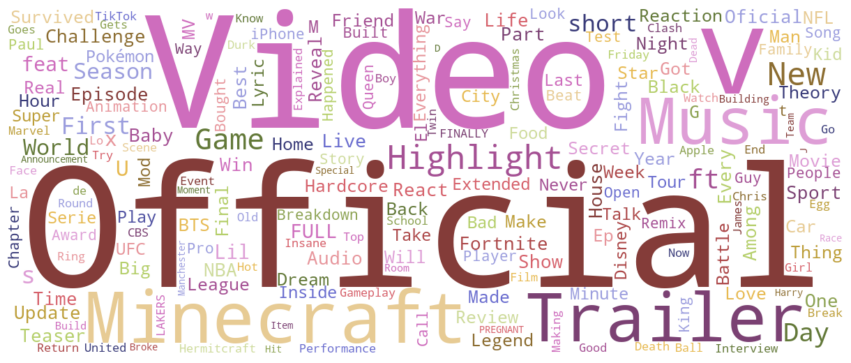

In [ ]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc, interpolation='bilinear')
_ = plt.axis("off")

###Canada

In [ ]:
title_words = list(CAvideo["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 45645),
 ('-', 35274),
 ('The', 20560),
 ('the', 14507),
 ('I', 14325),
 ('in', 11995),
 ('&', 9875),
 ('to', 9798),
 ('of', 9599),
 ('a', 9375),
 ('(Official', 8282),
 ('Video)', 7583),
 ('and', 6598),
 ('A', 6517),
 ('Trailer', 5542),
 ('Minecraft', 5457),
 ('on', 5025),
 ('Music', 4679),
 ('To', 4429),
 ('My', 4407),
 ('Official', 4328),
 ('with', 4017),
 ('2022', 3854),
 ('2', 3765),
 ('vs', 3763)]

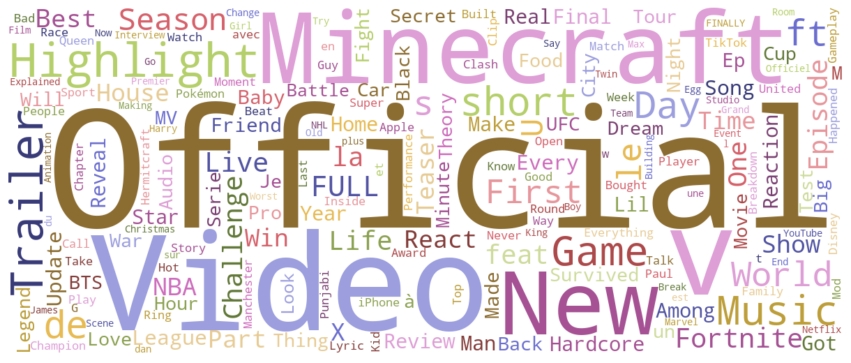

In [ ]:
wc_ca = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc_ca, interpolation='bilinear')
_ = plt.axis("off")

###Great British

In [ ]:
title_words = list(GBvideo["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(25)

[('|', 54743),
 ('-', 35169),
 ('The', 21264),
 ('I', 15038),
 ('the', 14977),
 ('&', 12038),
 ('in', 11713),
 ('to', 10435),
 ('of', 9456),
 ('a', 8848),
 ('(Official', 8479),
 ('Video)', 7720),
 ('and', 7161),
 ('A', 7008),
 ('Highlights', 6700),
 ('vs', 5665),
 ('Trailer', 5324),
 ('on', 5165),
 ('To', 4832),
 ('with', 4711),
 ('My', 4699),
 ('Minecraft', 4468),
 ('Official', 4408),
 ('for', 4108),
 ('Music', 4099)]

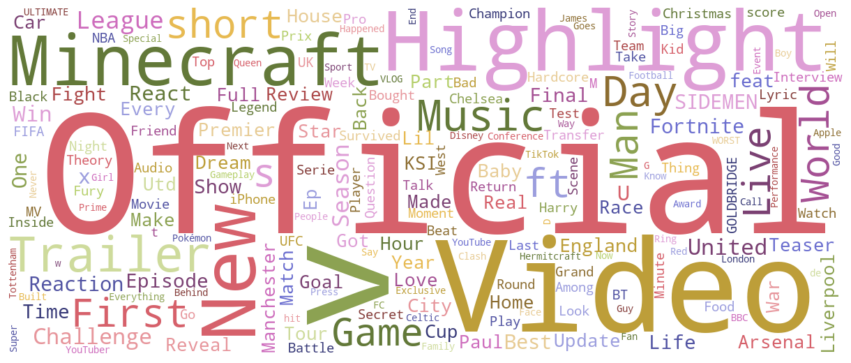

In [ ]:
wc_gb = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(15,10))
plt.imshow(wc_gb, interpolation='bilinear')
_ = plt.axis("off")

##channels with the largest number of trending videos

###US

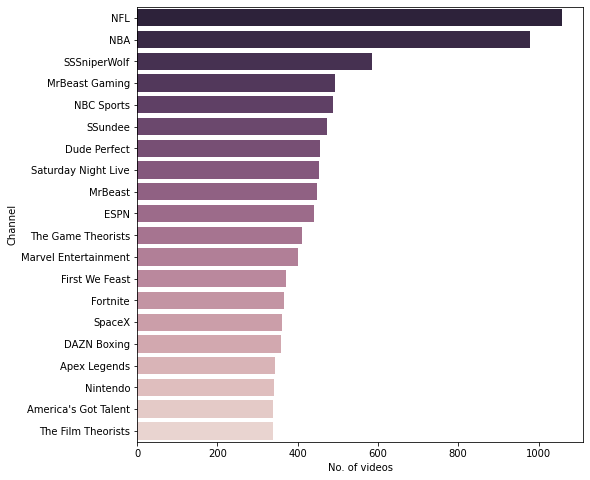

In [ ]:
cdf = USvideo.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channelTitle", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

###Canada

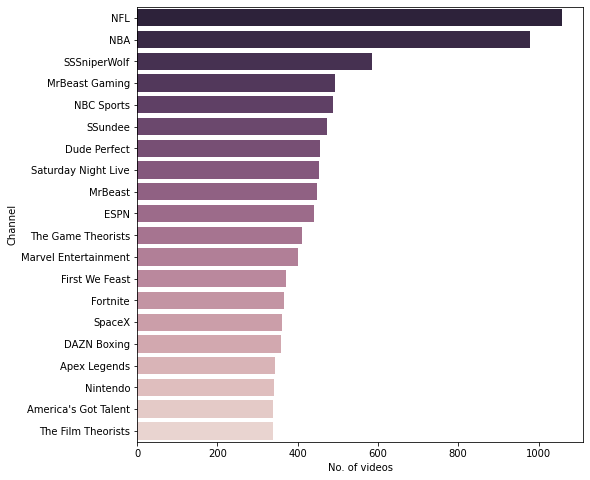

In [ ]:
cdf_ca = CAvideo.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channelTitle", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

###Great British

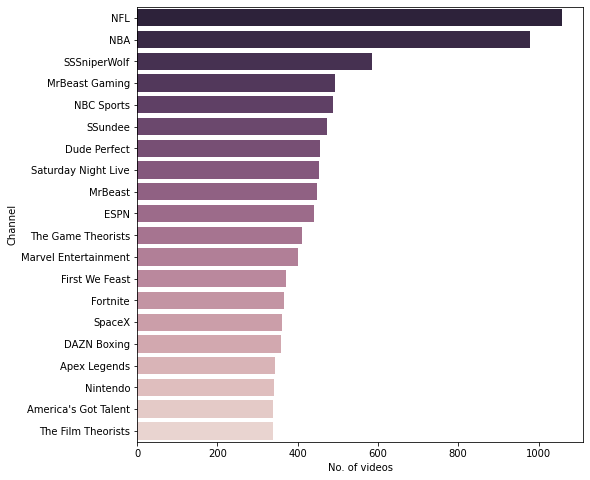

In [ ]:
cdf_gb = GBvideo.groupby("channelTitle").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
_ = sns.barplot(x="video_count", y="channelTitle", data=cdf,
                palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
_ = ax.set(xlabel="No. of videos", ylabel="Channel")

##video category with the largest number of trending videos

###US

In [ ]:
import json
with open('/content/gdrive/My Drive/242project/US_category_id.json') as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
USvideo['category_name'] = USvideo['categoryId'].map(cat_dict)

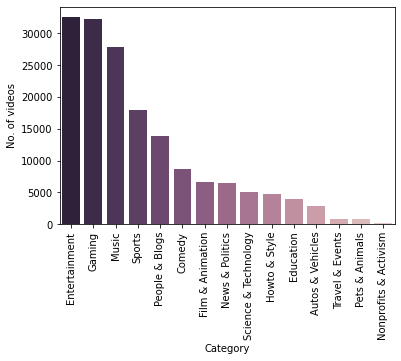

In [ ]:
cdf = USvideo["category_name"].value_counts().to_frame().reset_index()
cdf.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

###Canada

In [ ]:
with open('/content/gdrive/My Drive/242project/CA_category_id.json') as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
    CAvideo['category_name'] =CAvideo['categoryId'].map(cat_dict)

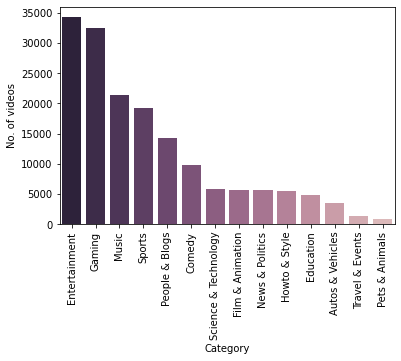

In [ ]:
cdf_ca = CAvideo["category_name"].value_counts().to_frame().reset_index()
cdf_ca.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf_ca, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

###Great British

In [ ]:
with open('/content/gdrive/My Drive/242project/GB_category_id.json') as f:
    categories = json.load(f)["items"]
cat_dict = {}
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
    GBvideo['category_name'] =GBvideo['categoryId'].map(cat_dict)

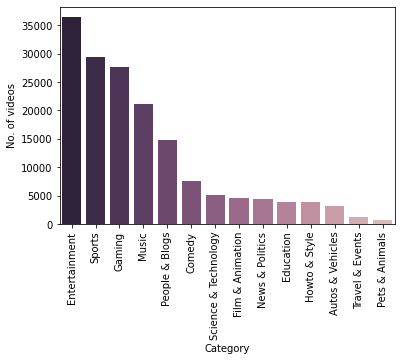

In [ ]:
cdf_gb = GBvideo["category_name"].value_counts().to_frame().reset_index()
cdf_gb.rename(columns={"index": "category_name", "category_name": "No_of_videos"}, inplace=True)
fig, ax = plt.subplots()
_ = sns.barplot(x="category_name", y="No_of_videos", data=cdf_gb, 
                palette=sns.cubehelix_palette(n_colors=16, reverse=True), ax=ax)
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
_ = ax.set(xlabel="Category", ylabel="No. of videos")

##Trending videos and their publishing time(day hour)

###US

In [ ]:
import datetime
USvideo["publishing_day"] = USvideo["publishedAt"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
USvideo["publishing_hour"] = USvideo["publishedAt"].apply(lambda x: x[11:13])
USvideo.drop(labels='publishedAt', axis=1, inplace=True)

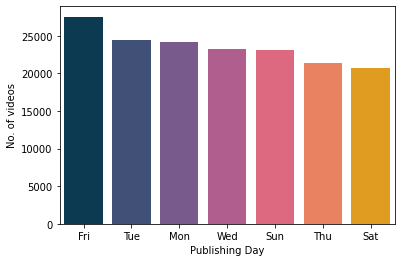

In [ ]:
cdf = USvideo["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

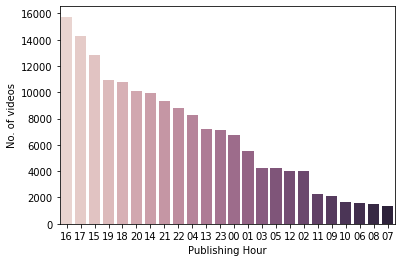

In [ ]:
cdf = USvideo["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

###Canada

In [ ]:
CAvideo["publishing_day"] = CAvideo["publishedAt"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
CAvideo["publishing_hour"] = CAvideo["publishedAt"].apply(lambda x: x[11:13])
CAvideo.drop(labels='publishedAt', axis=1, inplace=True)

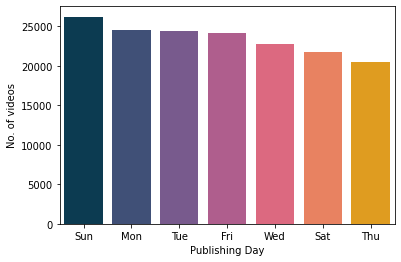

In [ ]:
cdf_ca = CAvideo["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf_ca, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

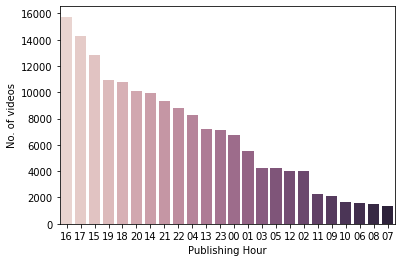

In [ ]:
cdf_ca = CAvideo["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

###Great British

In [ ]:
GBvideo["publishing_day"] = GBvideo["publishedAt"].apply(
    lambda x: datetime.datetime.strptime(x[:10], "%Y-%m-%d").date().strftime('%a'))
GBvideo["publishing_hour"] = GBvideo["publishedAt"].apply(lambda x: x[11:13])
GBvideo.drop(labels='publishedAt', axis=1, inplace=True)

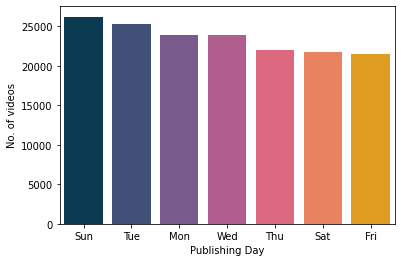

In [ ]:
cdf_gb = GBvideo["publishing_day"].value_counts()\
        .to_frame().reset_index().rename(columns={"index": "publishing_day", "publishing_day": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_day", y="No_of_videos", data=cdf_gb, 
                palette=sns.color_palette(['#003f5c', '#374c80', '#7a5195', 
                                           '#bc5090', '#ef5675', '#ff764a', '#ffa600'], n_colors=7), ax=ax)
_ = ax.set(xlabel="Publishing Day", ylabel="No. of videos")

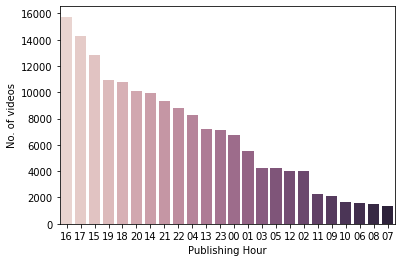

In [ ]:
cdf_gb = GBvideo["publishing_hour"].value_counts().to_frame().reset_index()\
        .rename(columns={"index": "publishing_hour", "publishing_hour": "No_of_videos"})
fig, ax = plt.subplots()
_ = sns.barplot(x="publishing_hour", y="No_of_videos", data=cdf, 
                palette=sns.cubehelix_palette(n_colors=24), ax=ax)
_ = ax.set(xlabel="Publishing Hour", ylabel="No. of videos")

# Cleaning up

In [ ]:
ac = [USvideo,CAvideo,GBvideo ]

In [ ]:
# adding response varible
for i in ac:
  likes_rate = (i['likes']-i['dislikes'])/i['view_count']
  i['likes_rate'] = likes_rate

In [ ]:
#choose convention rate >= 0.07 as good
for i in ac:
  i['good'] = (i['likes_rate'] >= 0.07).astype('int32').astype('object')

In [ ]:
USvideo.columns

Index(['video_id', 'title', 'channelId', 'channelTitle', 'categoryId',
       'trending_date', 'tags', 'view_count', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'category_name', 'publishing_day',
       'publishing_hour', 'likes_rate', 'good'],
      dtype='object')

In [ ]:
CAvideo.columns

Index(['video_id', 'title', 'channelId', 'channelTitle', 'categoryId',
       'trending_date', 'tags', 'view_count', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'category_name', 'publishing_day',
       'publishing_hour', 'likes_rate', 'good'],
      dtype='object')

In [ ]:
GBvideo.columns

Index(['video_id', 'title', 'channelId', 'channelTitle', 'categoryId',
       'trending_date', 'tags', 'view_count', 'likes', 'dislikes',
       'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description', 'category_name', 'publishing_day',
       'publishing_hour', 'likes_rate', 'good'],
      dtype='object')

In [ ]:
#dropping columns
for i in ac:
  i.drop(columns=['video_id','channelId','categoryId','trending_date','view_count',
                  'likes','dislikes','comment_count','thumbnail_link', 'comments_disabled',
                  'ratings_disabled', 'description','publishing_day',	'publishing_hour',	'likes_rate'], inplace=True)
CAvideo.head()

,title,channelTitle,tags,category_name,good
0,Diljit Dosanjh: CLASH (Official) Music Video |...,Diljit Dosanjh,clash diljit dosanjh|diljit dosanjh|diljit dos...,Music,0
1,I left youtube for a month and THIS is what ha...,jacksepticeye,jacksepticeye|funny|funny meme|memes|jacksepti...,Entertainment,1
2,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,Apex Legends|Apex Legends characters|new Apex ...,Gaming,0
3,I ASKED HER TO BE MY GIRLFRIEND...,Brawadis,brawadis|prank|basketball|skits|ghost|funny vi...,People & Blogs,1
4,Ultimate DIY Home Movie Theater for The LaBran...,Mr. Kate,The LaBrant Family|DIY|Interior Design|Makeove...,Howto & Style,0


In [ ]:
for i in ac:
  x = []
  for j in i['tags']:
    x.append(j.replace("|",' '))
  i['tags'] = x

In [ ]:
CAvideo


,title,channelTitle,tags,category_name,good
0,Diljit Dosanjh: CLASH (Official) Music Video |...,Diljit Dosanjh,clash diljit dosanjh diljit dosanjh diljit dos...,Music,0
1,I left youtube for a month and THIS is what ha...,jacksepticeye,jacksepticeye funny funny meme memes jacksepti...,Entertainment,1
2,Apex Legends | Stories from the Outlands – “Th...,Apex Legends,Apex Legends Apex Legends characters new Apex ...,Gaming,0
3,I ASKED HER TO BE MY GIRLFRIEND...,Brawadis,brawadis prank basketball skits ghost funny vi...,People & Blogs,1
4,Ultimate DIY Home Movie Theater for The LaBran...,Mr. Kate,The LaBrant Family DIY Interior Design Makeove...,Howto & Style,0
...,...,...,...,...,...
168338,The world depends on a strange collection of i...,Veritasium,veritasium science physics,Education,0
168339,QUI A TRAHI JAMY ? ft @Amixem @Inoxtag @Maghla...,Jamy - Epicurieux,jamy jamy gourmaud c'est pas sorcier jami le m...,Science & Technology,1
168340,I Solved FNAF Security Breach (FINALE),FuhNaff,fnaf fnaf security breach fnaf song fnaf lore ...,Gaming,1
168341,How Fast can you beat Pokemon Red/Blue with ju...,Jrose11,Pokemon Jrose11 snorlax Solo Snorlax Pokemon R...,Gaming,0


0    120893
1     43626
Name: good, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


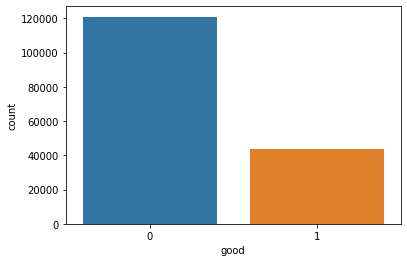

In [ ]:
import seaborn as sns

sns.countplot(USvideo['good'], order=USvideo['good'].value_counts().index);
print(USvideo['good'].value_counts())

0    116255
1     48114
Name: good, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


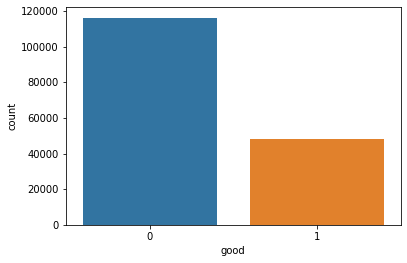

In [ ]:

sns.countplot(CAvideo['good'], order=CAvideo['good'].value_counts().index);
print(CAvideo['good'].value_counts())

0    125357
1     39172
Name: good, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


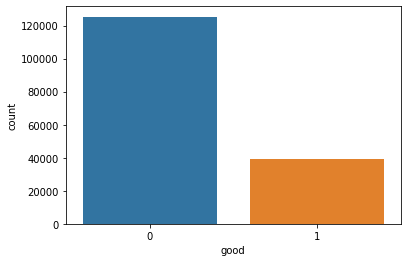

In [ ]:

sns.countplot(GBvideo['good'], order=GBvideo['good'].value_counts().index);
print(GBvideo['good'].value_counts())

In [ ]:
#remove punctuation
from string import punctuation

def remove_punctuation(document):

    no_punct = ''.join([character for character in document if character not in punctuation])
    
    return no_punct
#remove digits
def remove_digit(document): 
    
    no_digit = ''.join([character for character in document if not character.isdigit()])
              
    return no_digit
#
import nltk
nltk.download('punkt')

nltk.download("stopwords")

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def remove_stopwords(document):
    
    words = [word for word in document if not word in stop_words]
    
    return words
#stemming
from nltk.stem import PorterStemmer

porter = PorterStemmer()

def stemmer(document):
    
    stemmed_document = [porter.stem(word) for word in document]
    
    return stemmed_document

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
for j in ac:
  for i in ['title','tags']:
    j[i] = j[i].str.lower()
    j[i] = j[i].apply(remove_punctuation)
    j[i] = j[i].apply(remove_digit)
    j[i] = j[i].apply(word_tokenize)
    j[i] = j[i].apply(remove_stopwords)
    j[i] = j[i].apply(stemmer)


In [ ]:
CAvideo.head()

,title,channelTitle,tags,category_name,good
0,"[diljit, dosanjh, clash, offici, music, video,...",Diljit Dosanjh,"[clash, diljit, dosanjh, diljit, dosanjh, dilj...",Music,0
1,"[left, youtub, month, happen]",jacksepticeye,"[jacksepticey, funni, funni, meme, meme, jacks...",Entertainment,1
2,"[apex, legend, stori, outland, –, “, endors, ”]",Apex Legends,"[apex, legend, apex, legend, charact, new, ape...",Gaming,0
3,"[ask, girlfriend]",Brawadis,"[brawadi, prank, basketbal, skit, ghost, funni...",People & Blogs,1
4,"[ultim, diy, home, movi, theater, labrant, fam...",Mr. Kate,"[labrant, famili, diy, interior, design, makeo...",Howto & Style,0


In [ ]:
#adding sub
for country in ac:
  for i in country['title']:
   for j in range(len(i)):
      i[j] = i[j] +'_title'

for country in ac:
  for i in country['tags']:
    for j in range(len(i)):
      i[j] = i[j] +'_tag'
      
for i in ac:
  i['channelTitle'] = i['channelTitle'].str.replace(' ','')
  i['category_name'] = i['category_name'].str.replace(' ','')


In [ ]:
CAvideo.head()

,title,channelTitle,tags,category_name,good
0,"[diljit_title, dosanjh_title, clash_title, off...",DiljitDosanjh,"[clash_tag, diljit_tag, dosanjh_tag, diljit_ta...",Music,0
1,"[left_title, youtub_title, month_title, happen...",jacksepticeye,"[jacksepticey_tag, funni_tag, funni_tag, meme_...",Entertainment,1
2,"[apex_title, legend_title, stori_title, outlan...",ApexLegends,"[apex_tag, legend_tag, apex_tag, legend_tag, c...",Gaming,0
3,"[ask_title, girlfriend_title]",Brawadis,"[brawadi_tag, prank_tag, basketbal_tag, skit_t...",People&Blogs,1
4,"[ultim_title, diy_title, home_title, movi_titl...",Mr.Kate,"[labrant_tag, famili_tag, diy_tag, interior_ta...",Howto&Style,0


##Document-Term Matrix

###US

In [ ]:
#detoken
from nltk.tokenize.treebank import TreebankWordDetokenizer

title_detoken = USvideo['title'] .apply(TreebankWordDetokenizer().detokenize)
tags_detoken = USvideo['tags'] .apply(TreebankWordDetokenizer().detokenize)
ct_detoken = pd.Series(USvideo['channelTitle'], index = USvideo.index)
category_detoken = pd.Series(USvideo['category_name'], index = USvideo.index)

In [ ]:
#remove non ASCII
def remove_non_ascii(string):
  return ''.join(char for char in string if ord(char) < 128)

In [ ]:
title_detoken = title_detoken.apply(remove_non_ascii)
tags_detoken = title_detoken.apply(remove_non_ascii)
ct_detoken = ct_detoken.apply(remove_non_ascii)
category_detoken = category_detoken.apply(remove_non_ascii)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer(min_df = 0.01)

sparse_dtm_title = countvec.fit_transform(title_detoken)
dtm_title = pd.DataFrame(sparse_dtm_title.toarray(), columns=countvec.get_feature_names(), index=USvideo .index)
sparse_dtm_tag = countvec.fit_transform(tags_detoken)
dtm_tag = pd.DataFrame(sparse_dtm_tag.toarray(), columns=countvec.get_feature_names(), index=USvideo.index)
sparse_dtm_category = countvec.fit_transform(category_detoken)
dtm_category = pd.DataFrame(sparse_dtm_category.toarray(), columns=countvec.get_feature_names(), index=USvideo.index)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
countvec1 = CountVectorizer(min_df = 0.005)
sparse_dtm_ct = countvec1.fit_transform(ct_detoken)
dtm_channeltitle = pd.DataFrame(sparse_dtm_ct.toarray(), columns=countvec1.get_feature_names(), index=USvideo.index)


In [ ]:

dtm_all_US = pd.concat([dtm_title,dtm_tag,dtm_category,dtm_channeltitle],axis = 1)


In [ ]:
dtm_all_US.sum().sort_values(ascending=False)

entertainment    32555
gaming           32332
music            27885
offici_title     21682
offici_title     21682
                 ...  
time_title        1724
among_title       1715
among_title       1715
nfl               1059
nba                978
Length: 126, dtype: int64

there are  useful features.

In [ ]:
#dtm:
dtm_all_US.head()

,_title,among_title,anim_title,audio_title,babi_title,best_title,challeng_title,day_title,episod_title,everi_title,...,news,people,politics,science,sports,style,technology,vehicles,nba,nfl
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


###ca

In [ ]:
CAvideo = CAvideo.dropna()

In [ ]:
#detoken
title_detoken_ca = CAvideo['title'] .apply(TreebankWordDetokenizer().detokenize)
tags_detoken_ca = CAvideo['tags'] .apply(TreebankWordDetokenizer().detokenize)
ct_detoken_ca = pd.Series(CAvideo['channelTitle'], index = CAvideo.index)
category_detoken_ca = pd.Series(CAvideo['category_name'], index = CAvideo.index)

In [ ]:
title_detoken_ca = title_detoken_ca.apply(remove_non_ascii)
tags_detoken_ca = tags_detoken_ca.apply(remove_non_ascii)
ct_detoken_ca = ct_detoken_ca.apply(remove_non_ascii)
category_detoken_ca = category_detoken_ca.apply(remove_non_ascii)

In [ ]:
countvec = CountVectorizer(min_df = 0.01)

sparse_dtm_title = countvec.fit_transform(title_detoken_ca)
dtm_title = pd.DataFrame(sparse_dtm_title.toarray(), columns=countvec.get_feature_names(), index=CAvideo .index)
sparse_dtm_tag = countvec.fit_transform(tags_detoken_ca)
dtm_tag = pd.DataFrame(sparse_dtm_tag.toarray(), columns=countvec.get_feature_names(), index=CAvideo.index)
sparse_dtm_category = countvec.fit_transform(category_detoken_ca)
dtm_category = pd.DataFrame(sparse_dtm_category.toarray(), columns=countvec.get_feature_names(), index=CAvideo.index)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
countvec1 = CountVectorizer(min_df = 0.005)
sparse_dtm_ct = countvec1.fit_transform(ct_detoken_ca)
dtm_channeltitle = pd.DataFrame(sparse_dtm_ct.toarray(), columns=countvec1.get_feature_names(), index=CAvideo.index)


In [ ]:

dtm_all_CA = pd.concat([dtm_title,dtm_tag,dtm_category,dtm_channeltitle],axis = 1)


In [ ]:
dtm_all_CA.sum().sort_values(ascending=False)

_tag             94868
minecraft_tag    77401
game_tag         41236
new_tag          34756
entertainment    34264
                 ...  
everi_title       1756
ep_title          1710
tri_title         1698
got_title         1679
nba                866
Length: 264, dtype: int64

In [ ]:
#dtm:
dtm_all_CA.head()

,_title,best_title,challeng_title,day_title,de_title,ep_title,episod_title,everi_title,feat_title,final_title,...,music,news,people,politics,science,sports,style,technology,vehicles,nba
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


###GB

In [ ]:
GBvideo = GBvideo.dropna()

In [ ]:
#detoken
from nltk.tokenize.treebank import TreebankWordDetokenizer

title_detoken = GBvideo['title'] .apply(TreebankWordDetokenizer().detokenize)
tags_detoken = GBvideo['tags'] .apply(TreebankWordDetokenizer().detokenize)
ct_detoken = pd.Series(GBvideo['channelTitle'], index = GBvideo.index)
category_detoken = pd.Series(GBvideo['category_name'], index = GBvideo.index)

In [ ]:
title_detoken = title_detoken.apply(remove_non_ascii)
tags_detoken = title_detoken.apply(remove_non_ascii)
ct_detoken = ct_detoken.apply(remove_non_ascii)
category_detoken = category_detoken.apply(remove_non_ascii)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

countvec = CountVectorizer(min_df = 0.01)

sparse_dtm_title = countvec.fit_transform(title_detoken)
dtm_title = pd.DataFrame(sparse_dtm_title.toarray(), columns=countvec.get_feature_names(), index=GBvideo .index)
sparse_dtm_tag = countvec.fit_transform(tags_detoken)
dtm_tag = pd.DataFrame(sparse_dtm_tag.toarray(), columns=countvec.get_feature_names(), index=GBvideo.index)
sparse_dtm_category = countvec.fit_transform(category_detoken)
dtm_category = pd.DataFrame(sparse_dtm_category.toarray(), columns=countvec.get_feature_names(), index=GBvideo.index)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
countvec1 = CountVectorizer(min_df = 0.005)
sparse_dtm_ct = countvec1.fit_transform(ct_detoken)
dtm_channeltitle = pd.DataFrame(sparse_dtm_ct.toarray(), columns=countvec1.get_feature_names(), index=GBvideo.index)


In [ ]:

dtm_all_GB = pd.concat([dtm_title,dtm_tag,dtm_category,dtm_channeltitle],axis = 1)


In [ ]:
dtm_all_GB.sum().sort_values(ascending=False)

entertainment    36423
sports           29344
gaming           27731
_title           23946
_title           23946
                 ...  
back_title        1667
surviv_title      1667
match_title       1660
match_title       1660
btsport           1345
Length: 139, dtype: int64

In [ ]:
#dtm:
dtm_all_GB.head()

,_title,back_title,best_title,challeng_title,citi_title,cup_title,day_title,england_title,ep_title,episod_title,...,people,politics,science,sports,style,technology,vehicles,btsport,skysportsfootball,theunitedstand
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


# Models

#### Data Splits

In [ ]:
from sklearn.model_selection import train_test_split

y = USvideo['good'].astype('int32')
X = dtm_all_US

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=88)
X_train.shape, X_test.shape

((115163, 126), (49356, 126))

In [ ]:
CAvideo['good'].shape

(164273,)

In [ ]:
dtm_all_CA.shape

(164273, 264)

In [ ]:
from sklearn.model_selection import train_test_split

y_ca = CAvideo['good'].astype('int32')
X_ca = dtm_all_CA

X_ca_train, X_ca_test, y_ca_train, y_ca_test = train_test_split(X_ca, y_ca, test_size=0.3, random_state=88)
X_ca_train.shape, X_ca_test.shape

((114991, 264), (49282, 264))

In [ ]:
from sklearn.model_selection import train_test_split

y_gb = GBvideo['good'].astype('int32')
X_gb = dtm_all_GB

X_gb_train, X_gb_test, y_gb_train, y_gb_test = train_test_split(X_gb, y_gb, test_size=0.3, random_state=88)
X_gb_train.shape, X_gb_test.shape

((115105, 139), (49331, 139))

## Logistic Regression

###us

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=88)
logreg.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=88)

In [ ]:
var_names = list(df.feature_names)
coefficients = LogReg.coef_[0]
# Create a dataframe of the variables and coefficients & print it out
df = pd.DataFrame({"Variable" : var_names, "Coef": coefficients})
print(df)

In [ ]:
logreg.coef_

array([[ 0.08145463, -0.2777816 ,  0.25395894,  0.02303721, -0.33474994,
        -0.39334935, -0.22663865, -0.10069371,  0.28427747, -0.34233488,
        -0.08207942,  0.06573461, -0.16708697, -0.84087033, -0.02270532,
        -0.24535363, -0.04878597, -0.08001922, -0.01550011, -0.96424545,
        -0.07555559,  0.01242282, -0.1310653 ,  0.11570372,  0.05857705,
        -0.08041107,  0.07185569,  0.27806382, -0.32281767, -0.11329728,
        -0.2303786 , -0.32221869,  0.01034589,  0.08009081, -0.02211957,
        -0.26742625, -0.26368903, -0.59205674,  0.14527429,  0.01726963,
        -0.20547904, -0.31451803,  0.11918153,  0.16132935, -0.44307378,
        -0.07499784, -0.15108247, -0.287824  ,  0.04648954, -0.32716578,
        -0.48730032, -0.0815279 , -0.03778314,  0.08145463, -0.2777816 ,
         0.25395894,  0.02303721, -0.33474994, -0.39334935, -0.22663865,
        -0.10069371,  0.28427747, -0.34233488, -0.08207942,  0.06573461,
        -0.16708697, -0.84087033, -0.02270532, -0.2

In [ ]:
pd.DataFrame(logreg.coef_.ravel(), X_train.columns).sort_values(by = 0, ascending = False)

,0
comedy,1.181329
music,0.720802
education,0.292698
episod_title,0.284277
episod_title,0.284277
...,...
highlight_title,-0.964245
nfl,-1.357991
sports,-2.204468
politics,-2.257117


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
y_prob = logreg.predict_proba(X_test)
lr_pred = pd.Series([1 if x > 0.5 else 0 for x in y_prob[:,1]], index=y_test.index)

cm = confusion_matrix(y_test, lr_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, lr_pred))

Confusion Matrix: 
 [[34776  1492]
 [11126  1962]]

Accuracy: 0.7443471918307805


###CA

In [ ]:
logreg_ca = LogisticRegression(random_state=88)
logreg_ca.fit(X_ca_train, y_ca_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=88)

In [ ]:
pd.DataFrame(logreg_ca.coef_.ravel(), X_ca_train.columns).sort_values(by = 0, ascending = False)

,0
comedy,1.589008
bt_tag,0.787006
music,0.751151
episod_title,0.749273
de_title,0.656540
...,...
fortnit_title,-1.235503
sports,-1.526602
news,-1.958600
politics,-1.958600


In [ ]:
y_ca_prob = logreg_ca.predict_proba(X_ca_test)
lr_ca_pred = pd.Series([1 if x > 0.5 else 0 for x in y_ca_prob[:,1]], index=y_ca_test.index)

cm = confusion_matrix(y_ca_test, lr_ca_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_ca_test, lr_ca_pred))

Confusion Matrix: 
 [[32000  2734]
 [ 9460  5088]]

Accuracy: 0.7525668601111968


###GB

In [ ]:
logreg_gb = LogisticRegression(random_state=88)
logreg_gb.fit(X_gb_train, y_gb_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=88)

In [ ]:
pd.DataFrame(logreg_gb.coef_.ravel(), X_gb_train.columns).sort_values(by = 0, ascending = False)

,0
comedy,1.406567
music,0.853644
manchest_title,0.376305
manchest_title,0.376305
episod_title,0.316379
...,...
news,-1.675909
politics,-1.675909
theunitedstand,-1.888092
skysportsfootball,-1.903602


In [ ]:
y_gb_prob = logreg_gb.predict_proba(X_gb_test)
lr_gb_pred = pd.Series([1 if x > 0.5 else 0 for x in y_gb_prob[:,1]], index=y_gb_test.index)

cm = confusion_matrix(y_gb_test, lr_gb_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_gb_test, lr_gb_pred))

Confusion Matrix: 
 [[36425  1225]
 [ 9947  1734]]

Accuracy: 0.7735298291135392


## Random Forest Classifier

###us

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88)
rf.fit(X_train, y_train)

RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [ ]:
rf_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, rf_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, rf_pred))

Confusion Matrix: 
 [[35016  1252]
 [10645  2443]]

Accuracy: 0.7589553448415592


###ca

In [ ]:

rf_ca = RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88)
rf_ca.fit(X_ca_train, y_ca_train)

RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [ ]:
rf_ca_pred = rf_ca.predict(X_ca_test)
cm = confusion_matrix(y_ca_test, rf_ca_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_ca_test, rf_ca_pred))

Confusion Matrix: 
 [[33356  1378]
 [ 8455  6093]]

Accuracy: 0.8004748183921108


###GB

In [ ]:
rf_gb = RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500, random_state=88)
rf_gb.fit(X_gb_train, y_gb_train)

RandomForestClassifier(max_features=5, min_samples_leaf=5, n_estimators=500,
                       random_state=88)

In [ ]:
rf_gb_pred = rf_gb.predict(X_gb_test)
cm = confusion_matrix(y_gb_test, rf_gb_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_gb_test, rf_gb_pred))

Confusion Matrix: 
 [[36566  1084]
 [ 9610  2071]]

Accuracy: 0.7832194765968661


## Linear Discriminant Analysis

### us

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [ ]:
lda_pred = lda.predict(X_test)
cm = confusion_matrix(y_test, lda_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, lda_pred))

Confusion Matrix: 
 [[34559  1709]
 [10925  2163]]

Accuracy: 0.7440230164519005


###ca

In [ ]:
lda_ca = LinearDiscriminantAnalysis()
lda_ca.fit(X_ca_train, y_ca_train)

LinearDiscriminantAnalysis()

In [ ]:
lda_ca_pred = lda_ca.predict(X_ca_test)
cm = confusion_matrix(y_ca_test, lda_ca_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_ca_test, lda_ca_pred))

Confusion Matrix: 
 [[32183  2551]
 [ 9764  4784]]

Accuracy: 0.7501116026135303


### GB

In [ ]:
lda_gb = LinearDiscriminantAnalysis()
lda_gb.fit(X_gb_train, y_gb_train)

LinearDiscriminantAnalysis()

In [ ]:
lda_gb_pred = lda_gb.predict(X_gb_test)
cm = confusion_matrix(y_gb_test, lda_gb_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_gb_test, lda_gb_pred))

Confusion Matrix: 
 [[36078  1572]
 [ 9695  1986]]

Accuracy: 0.7716040623543006


##Decision Tree Classifier with CV

### us

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.001, 10)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=10).fit(X_train, y_train)

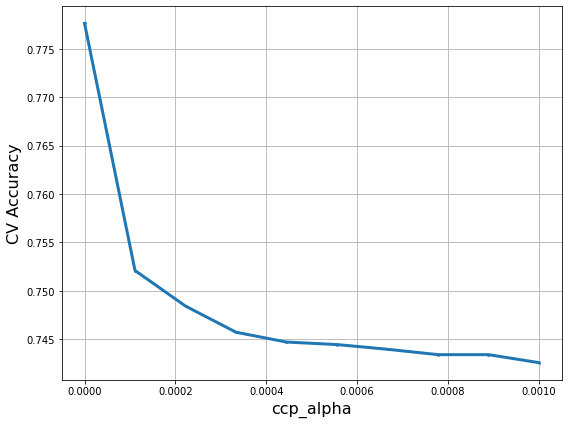

Best ccp_alpha {'ccp_alpha': 0.0}


In [ ]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

Node count = 6575


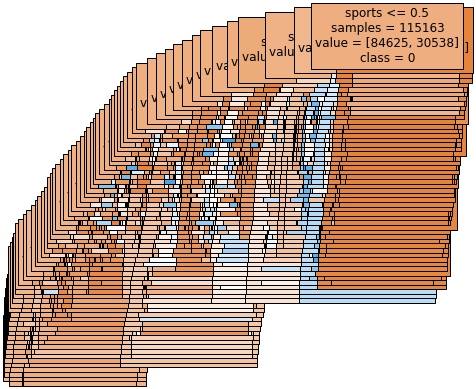

In [ ]:
from sklearn.tree import plot_tree

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(6,6))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[34443  1825]
 [ 9218  3870]]

Accuracy: 0.776258205689278


###ca

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.001, 10)}

dtc_ca = DecisionTreeClassifier(random_state=88)
dtc_ca_cv = GridSearchCV(dtc_ca, param_grid=grid_values, cv=10).fit(X_ca_train, y_ca_train)

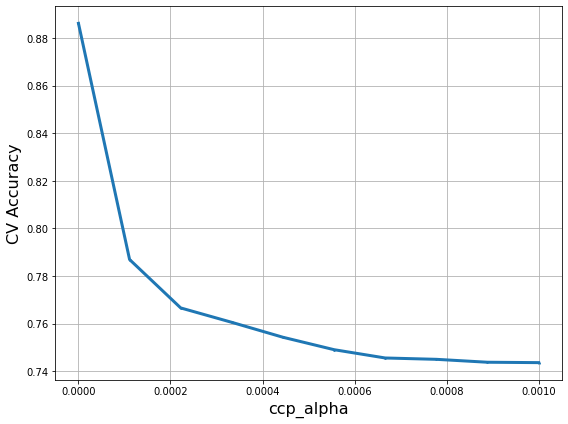

Best ccp_alpha {'ccp_alpha': 0.0}


In [ ]:
ccp_alpha_ca = dtc_ca_cv.cv_results_['param_ccp_alpha'].data
ACC_scores_ca = dtc_ca_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha_ca, ACC_scores_ca, s=3)
plt.plot(ccp_alpha_ca, ACC_scores_ca, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_ca_cv.best_params_)

Node count = 19065


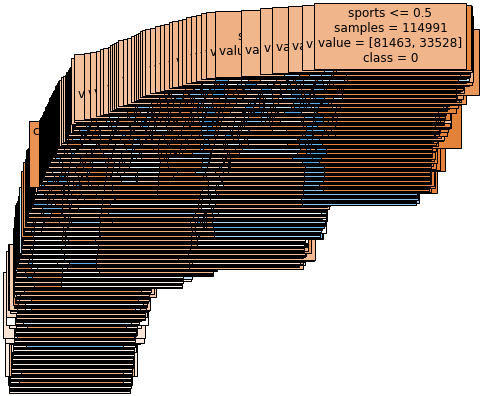

In [ ]:
from sklearn.tree import plot_tree

print('Node count =', dtc_ca_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(6,6))
plot_tree(dtc_ca_cv.best_estimator_, 
          feature_names=X_ca_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_ca_pred = dtc_ca_cv.predict(X_ca_test)
cm = confusion_matrix(y_ca_test, y_ca_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_ca_test, y_ca_pred))

Confusion Matrix: 
 [[33210  1524]
 [ 3849 10699]]

Accuracy: 0.8909743922730409


### GB

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.001, 10)}

dtc_gb = DecisionTreeClassifier(random_state=88)
dtc_gb_cv = GridSearchCV(dtc_gb, param_grid=grid_values, cv=10).fit(X_gb_train, y_gb_train)

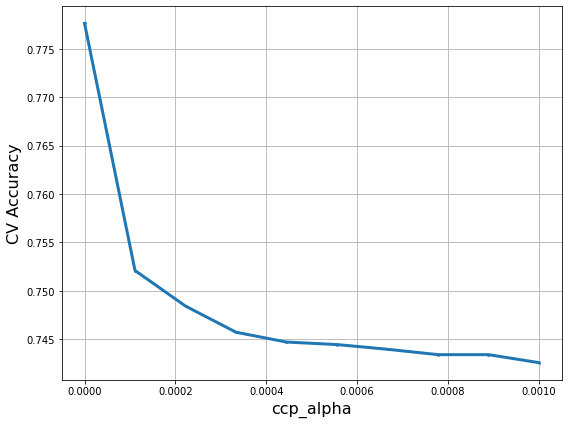

Best ccp_alpha {'ccp_alpha': 0.0}


In [ ]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

Node count = 6575


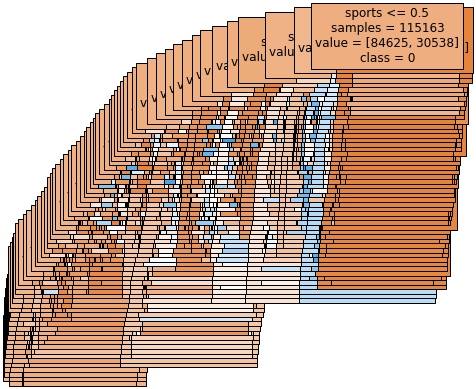

In [ ]:
from sklearn.tree import plot_tree

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(6,6))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[34443  1825]
 [ 9218  3870]]

Accuracy: 0.776258205689278


# Performance

### us

In [ ]:
#FPR and TPR
import sklearn
def TPR(predictions):
 cm = confusion_matrix(y_test, predictions)
 tn = cm[0,0]
 fn = cm[1,0]
 fp = cm[0,1]
 tp = cm[1,1]
 return tp/(tp + fn)
def FPR(predictions):
 cm = confusion_matrix(y_test, predictions)
 tn = cm[0,0]
 fn = cm[1,0]
 fp = cm[0,1]
 tp = cm[1,1]
 return fp/(fp + tn)

In [ ]:
fpr_lr = FPR(lr_pred)
fpr_rf = FPR(rf_pred)
fpr_lda = FPR(lda_pred)
fpr_dtc = FPR(y_pred)
tpr_lr = TPR(lr_pred)
tpr_rf = TPR(rf_pred)
tpr_lda = TPR(lda_pred)
tpr_dtc = TPR(y_pred)
#log_pred.shape
print("FPR of Logistic Regression:", fpr_lr)
print("FPR of Random Forest Classifier:", fpr_rf)
print("FPR of Linear Discriminant Analysis:", fpr_lda)
print("FPR of Decision Tree Classifier with CV:", fpr_dtc)
print("TPR of Logistic Regression:", tpr_lr)
print("TPR of Random Forest Classifier:", tpr_rf)
print("TPR of Linear Discriminant Analysis:", tpr_lda)
print("TPR of Decision Tree Classifier with CV:", tpr_dtc)

FPR of Logistic Regression: 0.04113819344877027
FPR of Random Forest Classifier: 0.034520789676850114
FPR of Linear Discriminant Analysis: 0.047121429359214734
FPR of Decision Tree Classifier with CV: 0.05031984118230948
TPR of Logistic Regression: 0.1499083129584352
TPR of Random Forest Classifier: 0.18665953545232275
TPR of Linear Discriminant Analysis: 0.1652658924205379
TPR of Decision Tree Classifier with CV: 0.2956907090464548


###ca

In [ ]:
#FPR and TPR
import sklearn
def TPR(predictions):
 cm = confusion_matrix(y_ca_test, predictions)
 tn = cm[0,0]
 fn = cm[1,0]
 fp = cm[0,1]
 tp = cm[1,1]
 return tp/(tp + fn)
def FPR(predictions):
 cm = confusion_matrix(y_ca_test, predictions)
 tn = cm[0,0]
 fn = cm[1,0]
 fp = cm[0,1]
 tp = cm[1,1]
 return fp/(fp + tn)

In [ ]:
fpr_ca_lr = FPR(lr_ca_pred)
fpr_ca_rf = FPR(rf_ca_pred)
fpr_ca_lda = FPR(lda_ca_pred)
fpr_ca_dtc = FPR(y_ca_pred)
tpr_ca_lr = TPR(lr_ca_pred)
tpr_ca_rf = TPR(rf_ca_pred)
tpr_ca_lda = TPR(lda_ca_pred)
tpr_ca_dtc = TPR(y_ca_pred)

print("FPR of Logistic Regression for Canada:", fpr_ca_lr)
print("FPR of Random Forest Classifier for Canada:", fpr_ca_rf)
print("FPR of Linear Discriminant Analysis for Canada:", fpr_ca_lda)
print("FPR of Decision Tree Classifier with CV for Canada:", fpr_ca_dtc)
print("TPR of Logistic Regression for Canada:", tpr_ca_lr)
print("TPR of Random Forest Classifier for Canada:", tpr_ca_rf)
print("TPR of Linear Discriminant Analysis for Canada:", tpr_ca_lda)
print("TPR of Decision Tree Classifier with CV for Canada:", tpr_ca_dtc)

FPR of Logistic Regression for Canada: 0.07871250071975586
FPR of Random Forest Classifier for Canada: 0.039672942937755515
FPR of Linear Discriminant Analysis for Canada: 0.07344388783324696
FPR of Decision Tree Classifier with CV for Canada: 0.04387631715322163
TPR of Logistic Regression for Canada: 0.3497387957107506
TPR of Random Forest Classifier for Canada: 0.4188204564201265
TPR of Linear Discriminant Analysis for Canada: 0.32884245257080014
TPR of Decision Tree Classifier with CV for Canada: 0.7354275501787187


### GB

In [ ]:
#FPR and TPR
import sklearn
def TPR(predictions):
 cm = confusion_matrix(y_gb_test, predictions)
 tn = cm[0,0]
 fn = cm[1,0]
 fp = cm[0,1]
 tp = cm[1,1]
 return tp/(tp + fn)
def FPR(predictions):
 cm = confusion_matrix(y_gb_test, predictions)
 tn = cm[0,0]
 fn = cm[1,0]
 fp = cm[0,1]
 tp = cm[1,1]
 return fp/(fp + tn)

In [ ]:
fpr_gb_lr = FPR(lr_gb_pred)
fpr_gb_rf = FPR(rf_gb_pred)
fpr_gb_lda = FPR(lda_gb_pred)
fpr_gb_dtc = FPR(y_gb_pred)
tpr_gb_lr = TPR(lr_gb_pred)
tpr_gb_rf = TPR(rf_gb_pred)
tpr_gb_lda = TPR(lda_gb_pred)
tpr_gb_dtc = TPR(y_gb_pred)
#log_pred.shape
print("FPR of Logistic Regression for British:", fpr_gb_lr)
print("FPR of Random Forest Classifier for British:", fpr_gb_rf)
print("FPR of Linear Discriminant Analysis for British:", fpr_gb_lda)
print("FPR of Decision Tree Classifier with CV for British:", fpr_gb_dtc)
print("TPR of Logistic Regression for British:", tpr_gb_lr)
print("TPR of Random Forest Classifier for British:", tpr_gb_rf)
print("TPR of Linear Discriminant Analysis for British:", tpr_gb_lda)
print("TPR of Decision Tree Classifier with CV for British:", tpr_gb_dtc)

FPR of Logistic Regression for British: 0.03253652058432935
FPR of Random Forest Classifier for British: 0.028791500664010625
FPR of Linear Discriminant Analysis for British: 0.04175298804780876
FPR of Decision Tree Classifier with CV for British: 0.04175298804780876
TPR of Logistic Regression for British: 0.14844619467511344
TPR of Random Forest Classifier for British: 0.1772964643438062
TPR of Linear Discriminant Analysis for British: 0.1700196900950261
TPR of Decision Tree Classifier with CV for British: 0.1700196900950261
